# German Housing Prices vs Unemployment Rate (2005–2025)

#### Goal: Explore how Unemployment rate trends relate to housing price changes in Germany (GREIX dataset)

In [3]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load unemployment rate data
unemp = pd.read_excel("Data/Germany annual average unemployment rate 2005-2025.xlsx")

# Load GREIX housing price data
greix = pd.read_excel("Data/GREIX_all_cities_data.xlsx")

# Display first few rows
print("Unemployment Data Sample:")
display(unemp.head(5))



Unemployment Data Sample:


,Year,Unemployment Rate (%)
0,2005,11.7
1,2006,10.8
2,2007,9.0
3,2008,7.8
4,2009,8.1


### Data Cleaning & Preparation

In [4]:
# Clean column names
unemp.columns = ["Year", "Unemployment_Rate (%)"]

# Keep only national GREIX data
greix_national = greix[greix["City"] == "GREIX"].copy()

# Compute yearly average price
yearly_prices = greix_national.groupby("Year", as_index=False)["Price"].mean()
yearly_prices.rename(columns={"Price": "Average_Price (€)"}, inplace=True)

# Filter for 2005–2025 to match unemployment years
yearly_prices = yearly_prices[yearly_prices["Year"].between(2005, 2025)]

# Merge unemployment and housing data
merged_unemp = pd.merge(yearly_prices, unemp, on="Year", how="inner")

print("Merged Data Sample:")
display(merged_unemp.head())


Merged Data Sample:


,Year,Average_Price (€),Unemployment_Rate (%)
0,2005,1383.333333,11.7
1,2006,1426.666667,10.8
2,2007,1443.333333,9.0
3,2008,1423.333333,7.8
4,2009,1433.333333,8.1


### Housing prices vs Unemployment rates

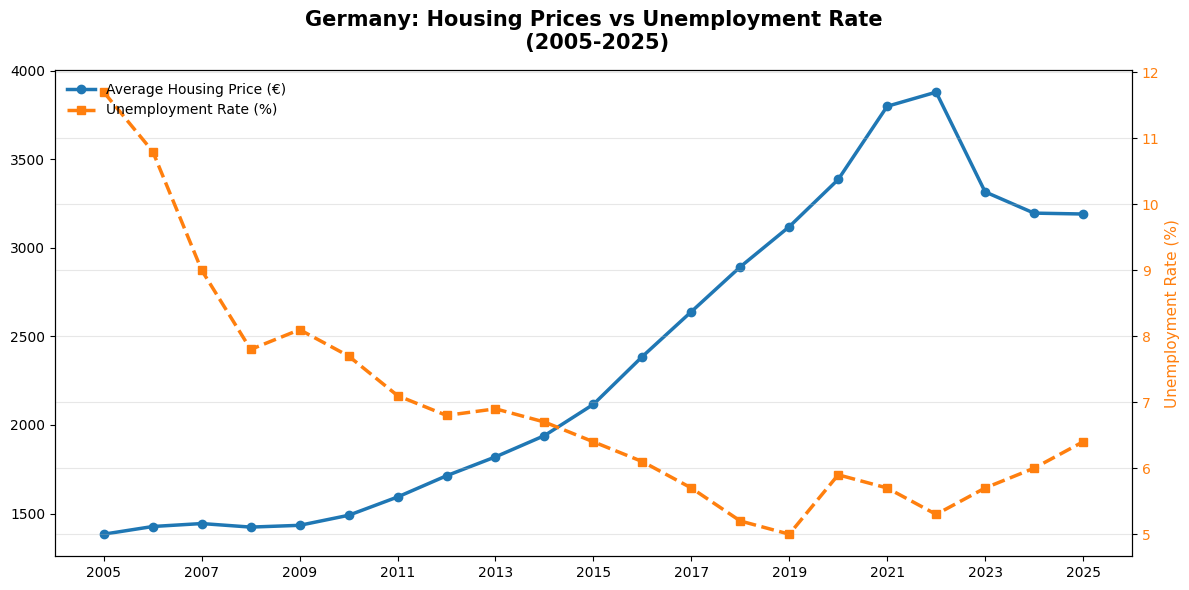

In [11]:
plt.figure(figsize=(12,6))

# Left axis — Housing Prices
line1, = plt.plot(
    merged_unemp["Year"],
    merged_unemp["Average_Price (€)"],
    color="#1f77b4",
    marker="o",
    linewidth=2.5,
    label="Average Housing Price (€)"
)

# Right axis — Unemployment Rate
ax2 = plt.twinx()
line2, = ax2.plot(
    merged_unemp["Year"],
    merged_unemp["Unemployment_Rate (%)"],
    color="#ff7f0e",
    linestyle="--",
    marker="s",
    linewidth=2.5,
    label="Unemployment Rate (%)"
)

# Titles & Labels
plt.title("Germany: Housing Prices vs Unemployment Rate\n (2005-2025)",
          fontsize=15, fontweight="bold", pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Housing Price (€)", color="#1f77b4", fontsize=11)
ax2.set_ylabel("Unemployment Rate (%)", color="#ff7f0e", fontsize=11)

# Customize ticks
plt.xticks(merged_unemp["Year"][::2], rotation=45)
plt.grid(alpha=0.3)
plt.tick_params(axis="y", labelcolor="#1f77b4")
ax2.tick_params(axis="y", labelcolor="#ff7f0e")

# Unified Legend
plt.legend(
    handles=[line1, line2],
    labels=["Average Housing Price (€)", "Unemployment Rate (%)"],
    loc="upper left",
    fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


As unemployment in Germany steadily declined after 2005, housing prices began to rise sharply — showing how stronger job markets often boost home demand and confidence. However, after 2020, unemployment ticked up slightly while prices cooled, reflecting how economic uncertainty can slow housing momentum.

### Correlation and simple summary stats

In [8]:
# Compute correlation coefficient
corr_value = merged_unemp["Average_Price (€)"].corr(merged_unemp["Unemployment_Rate (%)"])

# Compute summary statistics
summary_stats = merged_unemp[["Average_Price (€)", "Unemployment_Rate (%)"]].describe()

print(f"Correlation between housing prices and unemployment rate: {corr_value:.2f}\n")
print("Summary statistics:")
display(summary_stats)


Correlation between housing prices and unemployment rate: -0.75

Summary statistics:


,Average_Price (€),Unemployment_Rate (%)
count,21.000000,21.000000
mean,2361.666667,6.952381
std,876.852959,1.759437
min,1383.333333,5.000000
25%,1490.000000,5.700000
50%,2116.666667,6.400000
75%,3191.666667,7.700000
max,3880.000000,11.700000


The correlation between housing prices and unemployment rate is negative, confirming that periods of lower unemployment often align with rising property prices. This pattern reflects how stronger job markets typically boost income stability and homebuyer confidence.

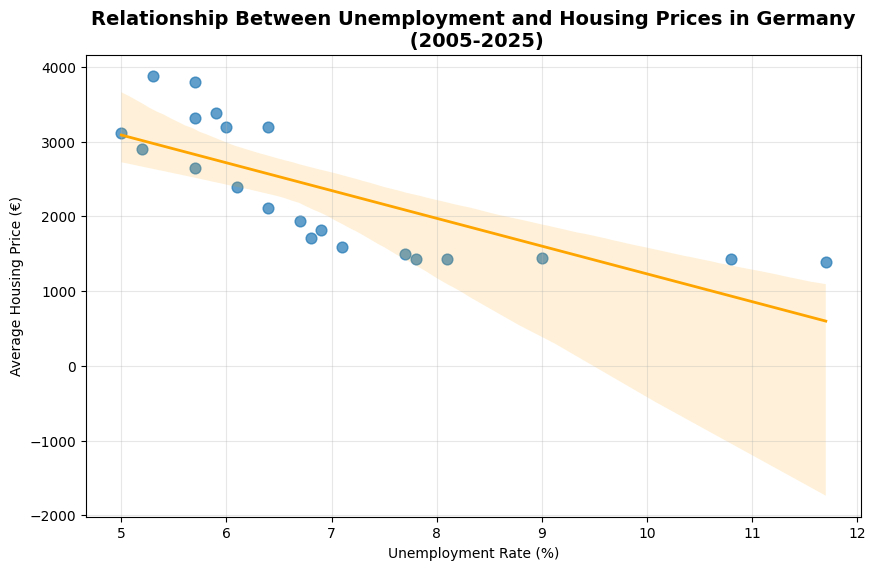

In [10]:
# Scatterplot + Regression line
plt.figure(figsize=(10,6))
sns.regplot(
    data=merged_unemp,
    x="Unemployment_Rate (%)",
    y="Average_Price (€)",
    scatter_kws={"s":60, "alpha":0.7},
    line_kws={"color":"orange", "lw":2}
)
plt.title("Relationship Between Unemployment and Housing Prices in Germany\n (2005-2025)",
          fontsize=14, fontweight="bold")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Average Housing Price (€)")
plt.grid(True, alpha=0.3)
plt.show()


As Germany’s unemployment rate steadily declined from 2005 to 2019, housing prices followed an upward trend, suggesting that stronger labor market conditions increased household purchasing power and housing demand.
However, during the post-2020 period, short-term disruptions (COVID-19 and economic uncertainty) caused brief reversals, showing how employment shocks can temporarily slow real estate momentum.